In [9]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv("train.csv")

def dfcleaner(dataframe):
    dataframe["Cabin"] = dataframe["Cabin"].fillna("0/999999/0")
    dataframe = dataframe.fillna(0)
    
    dataframe["Cabinnumber"] = dataframe["Cabin"].str.extract("\/(\w*)\/").astype("int32")
    dataframe["Cabindeck"] = dataframe["Cabin"].str.extract("^(\w*)\/")
    dataframe["Cabinside"] = dataframe["Cabin"].str.extract("\/(\w*)$")

    dataframe["Totalbill"] = dataframe["RoomService"] + dataframe["FoodCourt"] + dataframe["ShoppingMall"] + dataframe["Spa"] + dataframe["VRDeck"]

    dataframe["Group"] = dataframe["PassengerId"].str.extract("^(\d{4})")
    filter = dataframe["Group"].value_counts().to_frame().reset_index()
    filter.columns = ["Group", "Freq"]
    filter = filter[filter["Freq"] < 5]
    dataframe.loc[dataframe["Group"].isin(filter["Group"]), "Group"] = 0

    dataframe = pd.get_dummies(dataframe, columns = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabindeck", "Cabinside", "Group"], drop_first = True)
    #dataframe = pd.get_dummies(dataframe, columns = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabindeck", "Cabinside"], drop_first = True)
    
    
    dataframe.loc[dataframe["Cabinnumber"] == 999999, "Cabinnumber"] = 0

    return dataframe

In [10]:
df = dfcleaner(df)

In [11]:
df = df.select_dtypes(exclude = ["object"])

In [12]:
X, y = df.drop(["Transported"], axis = 1).values, df["Transported"].values
y = (y * 1).astype(np.int8)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.60, random_state = 42)

X_train.shape, X_val.shape, X_test.shape

((6085, 154), (1043, 154), (1565, 154))

In [14]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [15]:
#scaled_X_train = scaled_X_train.reshape(scaled_X_train.shape[0], scaled_X_train.shape[1], 1)
#scaled_X_val = scaled_X_val.reshape(scaled_X_val.shape[0], scaled_X_val.shape[1], 1)
#scaled_X_test = scaled_X_test.reshape(scaled_X_test.shape[0], scaled_X_test.shape[1], 1)

scaled_X_train.shape

(6085, 154)

In [24]:
y_pred = model.predict(scaled_X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int8)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       764
           1       0.75      0.78      0.76       801

    accuracy                           0.75      1565
   macro avg       0.75      0.75      0.75      1565
weighted avg       0.75      0.75      0.75      1565



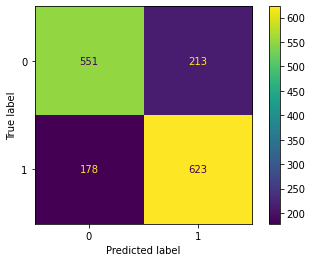

In [25]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       764
           1       0.77      0.83      0.80       801

    accuracy                           0.79      1565
   macro avg       0.79      0.78      0.78      1565
weighted avg       0.79      0.79      0.78      1565



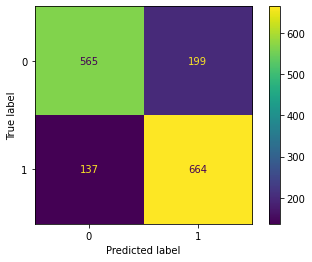

In [114]:
y_pred = ((y_pred > 0.5) * 1).astype(np.int8)